In [1]:
import numpy as np
import pandas as pd
import torch

ModuleNotFoundError: No module named 'numpy'

In [241]:
## Data Preprocess + First Model ##

In [ ]:
import json
with open('data/preprocessed.json', 'r') as file:
    data = json.load(file)

In [243]:
data = pd.DataFrame(data)
data

,player_id,date,first_name,last_name,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,...,ft_pct,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts
0,56677844,1729728000000,Bilal,Coulibaly,1,2,0.500000,0,0,0.000000,...,0.75,1,5,6,6,1,0,3,0,8
1,265,1729728000000,Kyle,Kuzma,6,16,0.375000,0,5,0.000000,...,0.00,0,2,2,1,1,1,1,1,12
2,1028028405,1729728000000,Alexandre,Sarr,1,7,0.142857,0,5,0.000000,...,0.00,1,4,5,1,0,2,0,2,2
3,666848,1729728000000,Jordan,Poole,9,17,0.529412,6,11,0.545455,...,1.00,0,1,1,4,4,1,4,3,26
4,1028025235,1729728000000,Carlton,Carrington,1,6,0.166667,0,2,0.000000,...,0.50,0,3,3,2,0,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,486,1731628800000,Christian,Wood,0,0,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6413,1028026974,1731628800000,Dalton,Knecht,0,1,0.000000,0,1,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6414,237,1731628800000,LeBron,James,0,1,0.000000,0,0,0.000000,...,0.00,0,1,1,0,0,0,1,0,0
6415,117,1731628800000,Anthony,Davis,0,1,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0


In [244]:
data['date'] = pd.to_datetime(data['date'], unit='ms')
data

,player_id,date,first_name,last_name,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,...,ft_pct,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts
0,56677844,2024-10-24,Bilal,Coulibaly,1,2,0.500000,0,0,0.000000,...,0.75,1,5,6,6,1,0,3,0,8
1,265,2024-10-24,Kyle,Kuzma,6,16,0.375000,0,5,0.000000,...,0.00,0,2,2,1,1,1,1,1,12
2,1028028405,2024-10-24,Alexandre,Sarr,1,7,0.142857,0,5,0.000000,...,0.00,1,4,5,1,0,2,0,2,2
3,666848,2024-10-24,Jordan,Poole,9,17,0.529412,6,11,0.545455,...,1.00,0,1,1,4,4,1,4,3,26
4,1028025235,2024-10-24,Carlton,Carrington,1,6,0.166667,0,2,0.000000,...,0.50,0,3,3,2,0,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,486,2024-11-15,Christian,Wood,0,0,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6413,1028026974,2024-11-15,Dalton,Knecht,0,1,0.000000,0,1,0.000000,...,0.00,0,0,0,0,0,0,0,0,0
6414,237,2024-11-15,LeBron,James,0,1,0.000000,0,0,0.000000,...,0.00,0,1,1,0,0,0,1,0,0
6415,117,2024-11-15,Anthony,Davis,0,1,0.000000,0,0,0.000000,...,0.00,0,0,0,0,0,0,0,0,0


In [245]:
# Combine first_name and last_name
data['player_name'] = data['first_name'] + ' ' + data['last_name']
# Remove first_name, last_name, turnover, pf, and player_id columns
data = data.drop(columns=['player_id','first_name','last_name','turnover','pf'])
# Move player_name to front
data = data[['player_name'] + data.columns.drop('player_name').tolist()]
data

,player_name,date,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,pts
0,Bilal Coulibaly,2024-10-24,1,2,0.500000,0,0,0.000000,6,8,0.75,1,5,6,6,1,0,8
1,Kyle Kuzma,2024-10-24,6,16,0.375000,0,5,0.000000,0,0,0.00,0,2,2,1,1,1,12
2,Alexandre Sarr,2024-10-24,1,7,0.142857,0,5,0.000000,0,0,0.00,1,4,5,1,0,2,2
3,Jordan Poole,2024-10-24,9,17,0.529412,6,11,0.545455,2,2,1.00,0,1,1,4,4,1,26
4,Carlton Carrington,2024-10-24,1,6,0.166667,0,2,0.000000,1,2,0.50,0,3,3,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,Christian Wood,2024-11-15,0,0,0.000000,0,0,0.000000,0,0,0.00,0,0,0,0,0,0,0
6413,Dalton Knecht,2024-11-15,0,1,0.000000,0,1,0.000000,0,0,0.00,0,0,0,0,0,0,0
6414,LeBron James,2024-11-15,0,1,0.000000,0,0,0.000000,0,0,0.00,0,1,1,0,0,0,0
6415,Anthony Davis,2024-11-15,0,1,0.000000,0,0,0.000000,0,0,0.00,0,0,0,0,0,0,0


In [246]:
# Check for missing values
data.isna().sum() # None, Yay!

player_name    0
date           0
fgm            0
fga            0
fg_pct         0
fg3m           0
fg3a           0
fg3_pct        0
ftm            0
fta            0
ft_pct         0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
pts            0
dtype: int64

In [247]:
projections = pd.read_json('../data/prizepicks_cleaned.json')
projections = projections[~projections['name'].str.contains(r'\+')]
projections.head()

,type,description,line_score,stat_type,start_time,status,name
11,projection,HOU,27.5,Pts+Rebs,2024-11-15 20:10:00-05:00,pre_game,James Harden
12,projection,HOU,6.0,Rebounds,2024-11-15 20:10:00-05:00,pre_game,James Harden
13,projection,HOU,29.5,Pts+Asts,2024-11-15 20:10:00-05:00,pre_game,James Harden
14,projection,HOU,36.5,Pts+Rebs+Asts,2024-11-15 20:10:00-05:00,pre_game,James Harden
15,projection,HOU,44.5,Fantasy Score,2024-11-15 20:10:00-05:00,pre_game,James Harden


In [248]:
point_projection = projections[projections['stat_type'] == 'Points']
point_projection = point_projection[['name', 'line_score']].reset_index(drop=True)
point_projection.head()

,name,line_score
0,James Harden,21.0
1,Jalen Green,20.5
2,Norman Powell,21.5
3,Alperen Sengun,18.5
4,Ivica Zubac,14.0


In [249]:
data_and_proj = data.merge(point_projection, left_on='player_name', right_on='name', how='inner')
data_and_proj.head()

,player_name,date,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,pts,name,line_score
0,Michael Porter Jr.,2024-10-24,5,17,0.294000,3,10,0.300000,2,2,1.0,1,7,8,2,1,0,15,Michael Porter Jr.,20.0
1,Michael Porter Jr.,2024-10-26,4,13,0.307692,0,6,0.000000,1,1,1.0,2,7,9,3,2,0,9,Michael Porter Jr.,20.0
2,Michael Porter Jr.,2024-10-28,6,12,0.500000,1,4,0.250000,0,1,0.0,2,7,9,2,0,1,13,Michael Porter Jr.,20.0
3,Michael Porter Jr.,2024-10-29,6,11,0.545455,4,7,0.571429,0,1,0.0,1,4,5,2,1,0,16,Michael Porter Jr.,20.0
4,Michael Porter Jr.,2024-11-01,11,18,0.611111,3,7,0.428571,1,2,0.5,2,4,6,4,2,0,26,Michael Porter Jr.,20.0


In [250]:
data_and_proj = data_and_proj.sort_values(by=['player_name', 'date'])
data_and_proj

,player_name,date,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,pts,name,line_score
496,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,18.5
497,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,24.5
498,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,20.5
499,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,16.5
500,Alperen Sengun,2024-10-23,10,22,0.454545,2,3,0.666667,3,4,0.75,6,12,18,5,4,1,25,Alperen Sengun,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,Zach Edey,2024-11-08,5,8,0.625000,1,2,0.500000,3,3,1.00,2,6,8,2,1,2,14,Zach Edey,14.5
1008,Zach Edey,2024-11-10,5,7,0.714000,1,1,1.000000,1,2,0.50,3,3,6,2,4,1,12,Zach Edey,9.0
1009,Zach Edey,2024-11-10,5,7,0.714000,1,1,1.000000,1,2,0.50,3,3,6,2,4,1,12,Zach Edey,14.5
1010,Zach Edey,2024-11-13,3,8,0.375000,0,0,0.000000,6,6,1.00,4,4,8,1,1,1,12,Zach Edey,9.0


In [251]:
data_and_proj['above_threshold'] = (data_and_proj['pts'] > data_and_proj['line_score']).astype(int)

In [252]:
# Computing the last 5 averages for each player
average_estimates = ['reb', 'ast', 'pts']
for col in average_estimates:
    data_and_proj[f'{col}_avg_last_5'] = data_and_proj.groupby('player_name')[col].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    
# Creating feature "on_hotstreak" to indicate if player is performing higher when compared to their average.
player_avg_pts = data_and_proj.groupby('player_name')['pts'].transform('mean')
player_avg_asts = data_and_proj.groupby('player_name')['ast'].transform('mean')
player_avg_reb = data_and_proj.groupby('player_name')['reb'].transform('mean')

# Then, compare the last 5-game average to the player's overall average and convert boolean to integers 
# where (1 if on hotstreak, 0 if not)
data_and_proj['on_hotstreak_pts'] = (data_and_proj['pts_avg_last_5'] > player_avg_pts).astype(int)
data_and_proj['on_hotstreak_asts'] = (data_and_proj['ast_avg_last_5'] > player_avg_asts).astype(int)
data_and_proj['on_hotstreak_reb'] = (data_and_proj['reb_avg_last_5'] > player_avg_reb).astype(int)

In [253]:
# Scale to normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['fgm', 'fga', 'pts','fg3m','fg3a','fta','ftm']
data_and_proj[numerical_cols] = scaler.fit_transform(data_and_proj[numerical_cols])

In [254]:
features = ["fgm", "fga", "pts", "fg3m", "fg3a", "fta",'ftm', "on_hotstreak_pts"]
X = data_and_proj[features]
y = data_and_proj["above_threshold"]

In [255]:
def create_sequences_with_names(data, target, sequence_length):
    sequences = []
    labels = []
    player_names = [] 
    
    for player, group in data.groupby("player_name"):
        group_features = group[features].values 
        group_labels = group[target].values
        
        for i in range(len(group) - sequence_length):
            sequences.append(group_features[i:i + sequence_length]) 
            labels.append(group_labels[i + sequence_length])        
            player_names.append(player)                             
    
    return np.array(sequences), np.array(labels), player_names

sequence_length = 5
X_seq, y_seq, player_names = create_sequences_with_names(data_and_proj, "above_threshold", sequence_length)

print(f"Number of sequences: {len(X_seq)}")
print(f"First sequence shape: {X_seq[0].shape}")
print(f"First player name: {player_names[0]}")

Number of sequences: 1115
First sequence shape: (5, 8)
First player name: Alperen Sengun


In [256]:
X_seq[:10]

array([[[0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ]],

       [[0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         0.25      , 0.2       , 1.        ],
        [0.71428571, 0.78571429, 0.55555556, 0.22222222, 0.2       ,
         

In [257]:
from sklearn.model_selection import train_test_split

# Assuming X and y are the full dataset tensors
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.3, random_state=42
)

# Convert to PyTorch tensors if needed
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [258]:
# Flatten train and test tensors for overlap detection
train_flat = X_train_tensor.view(X_train_tensor.size(0), -1)
test_flat = X_test_tensor.view(X_test_tensor.size(0), -1)

# Identify overlapping rows
overlap_mask = (test_flat[:, None] == train_flat).all(-1).any(-1)

# Use the overlap_mask to filter non-overlapping samples
X_test_tensor = X_test_tensor[~overlap_mask]
y_test_tensor = y_test_tensor[~overlap_mask]

print(f"New test set size: {X_test_tensor.size(0)}")

New test set size: 323


## Baseline LSTM

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_out = lstm_out[:, -1, :]
        output = self.fc(final_out)
        return self.sigmoid(output)

input_size = X_train_tensor.shape[2]
hidden_size = 128
output_size = 1

model = LSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

/Users/djmoon/Desktop/CSE151A/PrizePicksPredictor/prediction_model
/Users/djmoon/Desktop/CSE151A/PrizePicksPredictor/Preprocessing


In [260]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [261]:
import torch

num_epochs = 10
batch_size = 32

training_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    # Training batches
    for i in range(0, X_train_tensor.size(0), batch_size):
        batch_X = X_train_tensor[i:i + batch_size]
        batch_y = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()

        # Forward pass
        raw_predictions = model(batch_X).squeeze()
        loss = criterion(raw_predictions, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Evaluate training accuracy
    model.eval()
    with torch.no_grad():
        train_predictions = model(X_train_tensor).squeeze()
        train_predictions = (train_predictions >= 0.5).float()
        train_accuracy = (train_predictions == y_train_tensor).float().mean()

        # Evaluate test accuracy
        test_predictions = model(X_test_tensor).squeeze()
        test_predictions = (test_predictions >= 0.5).float()
        test_accuracy = (test_predictions == y_test_tensor).float().mean()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, "
          f"Train Accuracy: {train_accuracy * 100:.2f}%, "
          f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    training_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)



Epoch 1/10, Loss: 17.3413, Train Accuracy: 58.97%, Test Accuracy: 58.82%
Epoch 2/10, Loss: 16.8299, Train Accuracy: 58.97%, Test Accuracy: 58.82%
Epoch 3/10, Loss: 16.6047, Train Accuracy: 60.26%, Test Accuracy: 61.61%
Epoch 4/10, Loss: 16.2373, Train Accuracy: 64.36%, Test Accuracy: 61.30%
Epoch 5/10, Loss: 16.1469, Train Accuracy: 63.08%, Test Accuracy: 65.33%
Epoch 6/10, Loss: 15.7034, Train Accuracy: 66.03%, Test Accuracy: 64.71%
Epoch 7/10, Loss: 15.4212, Train Accuracy: 67.05%, Test Accuracy: 65.02%
Epoch 8/10, Loss: 15.1045, Train Accuracy: 68.08%, Test Accuracy: 66.87%
Epoch 9/10, Loss: 15.0256, Train Accuracy: 67.44%, Test Accuracy: 65.94%
Epoch 10/10, Loss: 14.9321, Train Accuracy: 68.72%, Test Accuracy: 67.49%


In [262]:
# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    predictions = (predictions >= 0.5).float()  # Apply threshold for binary classification

    # Calculate accuracy
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 67.49%


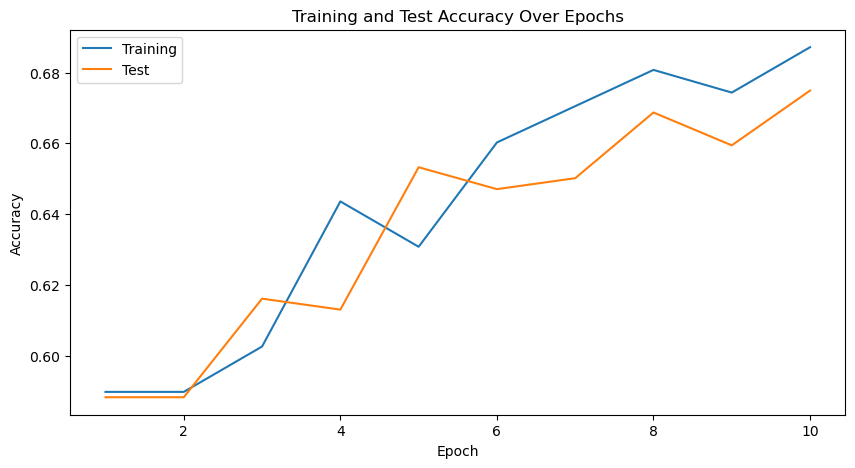

In [264]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracies, label="Training")
plt.plot(epochs, test_accuracies, label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy Over Epochs")
plt.legend()
plt.show()

## Ground Truth vs Prediction

In [270]:
model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor).squeeze()
    train_predictions = (train_predictions >= 0.5).float()
    print("Train Set:")
    for i in range(len(test_predictions)):
        print(f"Ground Truth: {y_train_tensor[i].item()}, Prediction: {train_predictions[i].item()}")

Train Set:
Ground Truth: 0.0, Prediction: 1.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 0.0
Ground Tr

In [269]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).squeeze()
    test_predictions = (test_predictions >= 0.5).float()
    print("Test Set:")
    for i in range(len(test_predictions)):
        print(f"Ground Truth: {y_test_tensor[i].item()}, Prediction: {test_predictions[i].item()}")

Test Set:
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 1.0, Prediction: 1.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Truth: 1.0, Prediction: 0.0
Ground Truth: 0.0, Prediction: 0.0
Ground Tru

- Ground Truth 1.0 Count: 133
- Ground Truth 0.0 Count: 190
- Correct Predictions for 1.0: 50
- Correct Predictions for 0.0: 168
- False Positives (0.0 predicted as 1.0): 22
- False Negatives (1.0 predicted as 0.0): 83

- Accuracy: 67.49%
- Precision (for 1.0): 69.44%
- Recall (for 1.0): 37.59%
- F1 Score (for 1.0): 48.78%

The model shows improvement in both training and test accuracy as the number of epochs increases.
However, there is a noticeable gap between the training accuracy and the test accuracy, especially after epoch 6. This indicates that the model may be starting to overfit the training data. The training accuracy continues to improve, but the test accuracy seems to be falling behind.

Based on the current performance, we may try in future models to tune our hyperparameters and try different models such as Attention Long-short Term Model and Stacked Long-short Term Model. We may also want to add an regularization to help prevent overfitting the data.